## Софья Скобелева

# Самостоятельная работа 1

В этом задании нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. В качестве зависимой переменной возьмём температуру воздуха в градусах Цельсия (`Temperature (C)`).



Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные (то есть как независимые наблюдения в пространстве).

### Часть 1: Предобработка данных (3 балла)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.** Загрузите данные из файла `weatherHistory.csv`. Выведите первые 5 строк таблицы.

In [44]:
df = pd.read_csv('weatherHistory.csv')
df.head( )

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Задание 2.** Узнайте, что такое [apparent temperature](https://www.kxan.com/weather/difference-between-temperature-and-feels-like-temperature/) (также называемая "feels-like temperature" и "heat index"). Удалите какую-то переменную из набора данных и поясните, почему вы её удалили (помните о том, какая переменная будет целевой). Также удалите переменные:
- `Formatted Date` (потому что договорились, что не обращаем внимания на даты).
- `Daily Summary` (будем использовать просто `Summary`). 

In [45]:
df.corr()

/var/folders/2z/bf5mgy7j5pb1867dmyny89780000gn/T/ipykernel_53766/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


/var/folders/2z/bf5mgy7j5pb1867dmyny89780000gn/T/ipykernel_53766/2524401068.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot = True);


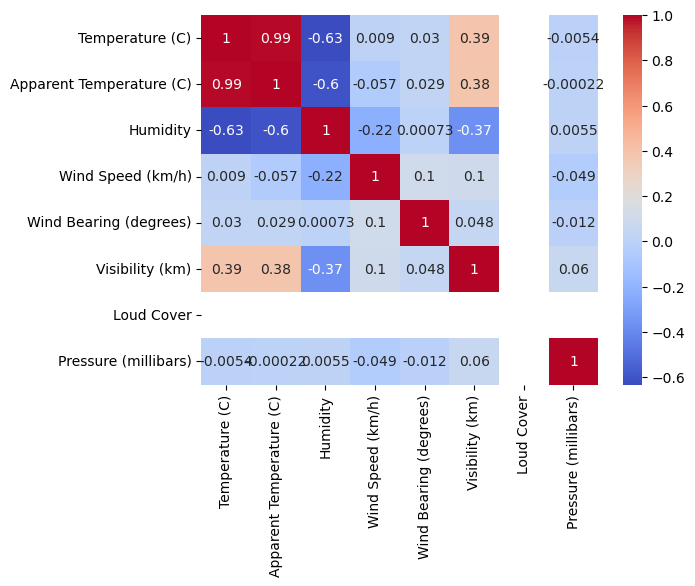

In [46]:
sns.heatmap(df.corr(), cmap='coolwarm', annot = True);

Аpparent temperature - температура по ощущениям в Цельсиях.  
Целевая переменная - температура воздуха в градусах Цельсия (`Temperature (C)`). Она очень сильно коррелирует с температурой по ощущениям (`Apparent Temperature (C)`), поэтому переменную `Apparent Temperature (C)` нужно удалить. Корреляции остальных переменных в пределе нормы, поэтому их оставляем.

Удалим переменные:

In [47]:
df.drop('Apparent Temperature (C)', axis=1, inplace=True)
df.drop('Formatted Date', axis=1, inplace=True)
df.drop('Daily Summary', axis=1, inplace=True)

In [48]:
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


**Задание 3.** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [49]:
df.isnull().sum()

Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [50]:
df.dropna()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


In [51]:
df.isnull().sum()

Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [52]:
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


**Задание 4.** В данных есть одна числовая переменная, которая не несёт информации для предсказания целевой переменной. Найдите эту переменную, поясните ваш выбор и удалите её. 

Переменные в датасете:
* Summary
* Precip Type - тип осадков
* Temperature (C) - температура в градусах Цельсия, целевая переменная
* Humidity - влажность
* Wind Speed (km/h) - скорость ветра (км/ч)
* Wind Bearing (degrees) - направление ветра
* Visibility (km) - видимость (км)
* Сloud Сover - облачность
* Pressure (millibars) - давление (миллибары)

In [53]:
df['Loud Cover'].unique()

array([0.])

Переменная `Loud Cover` принимает только значение 0, следовательно, не несёт информации для предсказания целевой переменной `Temperature (C)`, удалим ее.

In [54]:
df.drop('Loud Cover', axis=1, inplace=True)

In [55]:
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


**Задание 5.** Преобразуйте категориальные переменные при помощи One Hot Encoding (то есть переведите их в дамми-переменные).

In [56]:
# категориальные переменные 
var_cat = ['Summary', 'Precip Type']

In [57]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [58]:
df['Summary'].describe()

count             96453
unique               27
top       Partly Cloudy
freq              31733
Name: Summary, dtype: object

In [59]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [60]:
#кодируем бинарные категориальные признаки
df['Precip Type'] = df['Precip Type'].apply(lambda x: 0 if x == 'snow' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
df = pd.get_dummies(df)
df.head()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Задание 6.** Выведите корреляционную матрицу переменных. Какие переменные лучше всего коррелируют с целевой (назовите три)? 


In [68]:
correlation_matrix = df.corr()
correlation_matrix

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
Precip Type,1.000000,0.562620,-0.232113,0.067928,0.041984,0.312875,-0.009008,-0.008373,0.001138,-0.040043,...,0.089626,-0.066156,0.126709,0.003599,0.003219,0.001138,-0.002848,0.006734,0.003052,0.009319
Temperature (C),0.562620,1.000000,-0.632255,0.008957,0.029988,0.392847,-0.005447,-0.009938,0.003094,-0.024820,...,0.046758,-0.210783,0.299993,-0.001958,-0.004890,0.005154,-0.000038,-0.000196,-0.009047,-0.005423
Humidity,-0.232113,-0.632255,1.000000,-0.224951,0.000735,-0.369173,0.005454,-0.011760,-0.007823,0.019852,...,-0.032237,0.238667,-0.309247,0.011049,-0.007567,-0.008152,0.005439,-0.013149,-0.002899,-0.027798
Wind Speed (km/h),0.067928,0.008957,-0.224951,1.000000,0.103822,0.100749,-0.049263,0.073033,0.010712,0.062467,...,0.056356,0.080258,-0.070443,-0.007384,0.041306,0.013711,0.031082,0.089033,0.101774,0.128899
Wind Bearing (degrees),0.041984,0.029988,0.000735,0.103822,1.000000,0.047594,-0.011651,0.010031,0.001574,-0.004769,...,0.027104,-0.016882,0.017292,0.002303,0.011216,-0.001125,-0.001950,0.013115,0.011428,0.026421
Visibility (km),0.312875,0.392847,-0.369173,0.100749,0.047594,1.000000,0.059818,-0.004348,-0.000281,-0.039656,...,0.117738,-0.116603,0.244570,-0.020813,0.000793,-0.000281,-0.012971,0.003692,-0.002788,0.007149
Pressure (millibars),-0.009008,-0.005447,0.005454,-0.049263,-0.011651,0.059818,1.000000,-0.088893,0.000506,0.000928,...,0.041679,0.009340,0.058925,0.001226,-0.068197,0.000467,0.000481,-0.003813,0.000593,-0.011258
Summary_Breezy,-0.008373,-0.009938,-0.011760,0.073033,0.010031,-0.004348,-0.088893,1.000000,-0.000076,-0.000451,...,-0.015173,-0.010790,-0.016573,-0.000241,-0.000216,-0.000076,-0.000152,-0.000451,-0.000511,-0.000624
Summary_Breezy and Dry,0.001138,0.003094,-0.007823,0.010712,0.001574,-0.000281,0.000506,-0.000076,1.000000,-0.000061,...,-0.002064,-0.001468,-0.002255,-0.000033,-0.000029,-0.000010,-0.000021,-0.000061,-0.000070,-0.000085
Summary_Breezy and Foggy,-0.040043,-0.024820,0.019852,0.062467,-0.004769,-0.039656,0.000928,-0.000451,-0.000061,1.000000,...,-0.012214,-0.008686,-0.013341,-0.000194,-0.000174,-0.000061,-0.000123,-0.000363,-0.000412,-0.000502


In [70]:
sorted_correlation = correlation_matrix['Temperature (C)'].sort_values(ascending=False)
print(sorted_correlation.head(4)) 

Temperature (C)          1.000000
Precip Type              0.562620
Visibility (km)          0.392847
Summary_Partly Cloudy    0.299993
Name: Temperature (C), dtype: float64


Лучше всего с целевой переменной коррелируют переменные `Precip Type` (0.562620), `Visibility (km)` (0.392847), `Summary_Partly Cloudy` (0.299993)

**Задание 7.** Разделите данные на регрессоры (`X`) и целевую переменную (`y`)

In [71]:
features = df.drop('Temperature (C)', axis=1).columns
X, y = df[features], df['Temperature (C)']

**Задание 8.** Похоже ли распределение целевой переменной на нормальное?

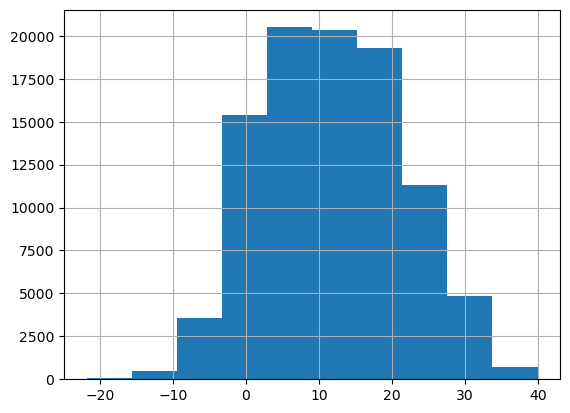

In [72]:
df['Temperature (C)'].hist();

В целом распределение целевой переменной похоже на нормальное

### Часть 2: Построение предсказательной модели (7 баллов)

**Задание 9.** На основании предыдущего анализа и логических соображений выберите шесть регрессоров (не считая константный), которые будут включены в  модель. Помните, что когда мы строим модель, выбор переменных должнен быть обоснован (не достаточно использовать предыдущий анализ, выбор каждой переменной должен иметь теоретическое или логическое обоснование). В качестве регрессоров можно брать переменные из `X` или преобразования над ними (`Humidity` и `Humidity`$^2$ будем считать разными регрессорами). Сохраните выбранные признаки в `X1`

Создайте ячейку Markdown ниже и запишите в неё функциональный вид модели, которую вы будете оценивать. Поясните выбор регрессоров (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации) и, если используете, выбор нелинейных преобразований над ними.

In [76]:
var_real = ['Humidity', 'Pressure (millibars)']
for var in var_real:
    df[var + '_sq'] = df[var]**2

In [224]:
df

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Humidity_sq,Pressure (millibars)_sq
0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,...,1,0,0,0,0,0,0,0,0.7921,1.030489e+06
1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,...,1,0,0,0,0,0,0,0,0.7396,1.031504e+06
2,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,...,0,0,0,0,0,0,0,0,0.7921,1.032134e+06
3,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,...,1,0,0,0,0,0,0,0,0.6889,1.033089e+06
4,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,...,0,0,0,0,0,0,0,0,0.6889,1.033293e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36,0,0,0,...,1,0,0,0,0,0,0,0,0.1849,1.028926e+06
96449,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16,0,0,0,...,1,0,0,0,0,0,0,0,0.2304,1.030550e+06
96450,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66,0,0,0,...,1,0,0,0,0,0,0,0,0.3136,1.031565e+06
96451,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95,0,0,0,...,1,0,0,0,0,0,0,0,0.3600,1.032154e+06


Модель

$$
y_i = \beta_0 + \beta_1 Humidity + \beta_2 Wind Speed(km/h) + \beta_3 Pressure (millibars) + \beta_4 Visibility (km) + \beta_5 Wind Bearing (degrees) + \beta_6 Pressure (millibars)^2 + \varepsilon_i
$$

Обоснование выбора переменных:
- $Humidity$ – влажность воздуха может влиять на температуру (влажный воздух может удерживать тепло лучше, чем сухой)
- $Wind Speed(km/h)$ - скорость ветра  может влиять на температуру(при большой скорости ветра скорее всего будет холоднее, чем при низкой)
- $Pressure (millibars)$ - давление  может влиять на температуру (при большем давлении большая температура и наоборот)
- $Pressure (millibars)^2$ – давление может нелинейно влиять на температуру (по свойставм идеальных газов)
- $Visibility (km)$ - видимость может влиять на температуру (если видимость снижена из-за тумана или дыма, это может снизить количество солнечного света, которое попадает на землю, что может повлиять на температуру)
- $Wind Bearing (degrees)$ - видимость может влиять на температуру (например, ветер с моря приносит прохладный воздух, температура становится ниже)

**Задание 10.** Разделите выборку на обучающую и тестовую.

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задание 11.** Постройте предсказательную модель (линейную/полиномиальную). Оцените ее качество.

In [252]:
X1 = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)', 'Visibility (km)', 'Wind Bearing (degrees)', 'Summary_Mostly Cloudy']]

In [253]:
features = X1.drop('Temperature (C)', axis=1).columns
X, y = X1[features], X1['Temperature (C)']

In [254]:
X

,Humidity,Wind Speed (km/h),Pressure (millibars),Visibility (km),Wind Bearing (degrees),Summary_Mostly Cloudy
0,0.89,14.1197,1015.13,15.8263,251.0,0
1,0.86,14.2646,1015.63,15.8263,259.0,0
2,0.89,3.9284,1015.94,14.9569,204.0,1
3,0.83,14.1036,1016.41,15.8263,269.0,0
4,0.83,11.0446,1016.51,15.8263,259.0,1
...,...,...,...,...,...,...
96448,0.43,10.9963,1014.36,16.1000,31.0,0
96449,0.48,10.0947,1015.16,15.5526,20.0,0
96450,0.56,8.9838,1015.66,16.1000,30.0,0
96451,0.60,10.5294,1015.95,16.1000,20.0,0


In [255]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Оценка качества модели
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

In [256]:
print(f'MSE на трейне: {mean_squared_error(y_train_pred, y_train)}')
print(f'MSE на тесте:  {mean_squared_error(y_test_pred, y_test)}\n')

print(f'RMSE на трейне: {np.sqrt(mean_squared_error(y_train_pred, y_train))}')
print(f'RMSE на тесте:  {np.sqrt(mean_squared_error(y_test_pred, y_test))}\n')

print(f'MAE на трейне: {mean_absolute_error(y_train_pred, y_train)}')
print(f'MAE на тесте:  {mean_absolute_error(y_test_pred, y_test)}\n')

print(f'MAPE на трейне: {mean_absolute_percentage_error(y_train_pred, y_train)}')
print(f'MAPE на тесте:  {mean_absolute_percentage_error(y_test_pred, y_test)}\n')

print(f'R2 на трейне: {r2_score(y_train_pred, y_train)}')
print(f'R2 на тесте:  {r2_score(y_test_pred, y_test)}')

MSE на трейне: 41.738630591942126
MSE на тесте:  41.591507122949224

RMSE на трейне: 6.460544140545912
RMSE на тесте:  6.449147782687975

MAE на трейне: 5.20014073304539
MAE на тесте:  5.188610184731311

MAPE на трейне: 2.806026512193708
MAPE на тесте:  1.6358810002107242

R2 на трейне: 0.153367178747289
R2 на тесте:  0.16724365031770017


**Задание 12.** Какие предикторы оказывают больший вклад в зависимую переменную? Сделайте необходимые преобразования для того, чтобы это выяснить. Проинтерпретируйте полученный результат.

In [257]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [258]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled )

# Оценка качества модели
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

In [259]:
print(f'MSE на трейне: {mean_squared_error(y_train_pred, y_train)}')
print(f'MSE на тесте:  {mean_squared_error(y_test_pred, y_test)}\n')

print(f'RMSE на трейне: {np.sqrt(mean_squared_error(y_train_pred, y_train))}')
print(f'RMSE на тесте:  {np.sqrt(mean_squared_error(y_test_pred, y_test))}\n')

print(f'MAE на трейне: {mean_absolute_error(y_train_pred, y_train)}')
print(f'MAE на тесте:  {mean_absolute_error(y_test_pred, y_test)}\n')

print(f'MAPE на трейне: {mean_absolute_percentage_error(y_train_pred, y_train)}')
print(f'MAPE на тесте:  {mean_absolute_percentage_error(y_test_pred, y_test)}\n')

print(f'R2 на трейне: {r2_score(y_train_pred, y_train)}')
print(f'R2 на тесте:  {r2_score(y_test_pred, y_test)}')

MSE на трейне: 41.73863059194213
MSE на тесте:  41.59150712294824

RMSE на трейне: 6.460544140545913
RMSE на тесте:  6.4491477826878985

MAE на трейне: 5.200140733045354
MAE на тесте:  5.188610184731232

MAPE на трейне: 2.806026531645037
MAPE на тесте:  1.6358810004234792

R2 на трейне: 0.153367178747293
R2 на тесте:  0.16724365031770194


In [260]:
model.coef_

array([ -30.29818293,  -17.44473862,  415.35871316,    4.8402997 ,
          0.75829127, -427.13812486])

Непропорционально больший вклад (несмотря на произведенную нормализацию признаков) в зависимую переменную у предиктора `Pressure (millibars)_sq` и у предиктора `Pressure (millibars)`

Модель получилась не очень хорошая, обяснительная сила очень низкая (около 15%), высокие ошибки

#### Задание 13

Добавьте регуляризацию. Получилось ли улучшить качество?

In [261]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 2000)

lasso.fit(X_train_scaled, y_train)

y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

print(lasso.coef_)

[-4.50395285 -0.         -0.          0.          0.         -0.        ]


In [262]:
print(f'MSE на трейне: {mean_squared_error(y_train_pred, y_train)}')
print(f'MSE на тесте:  {mean_squared_error(y_test_pred, y_test)}\n')

print(f'RMSE на трейне: {np.sqrt(mean_squared_error(y_train_pred, y_train))}')
print(f'RMSE на тесте:  {np.sqrt(mean_squared_error(y_test_pred, y_test))}\n')

print(f'MAE на трейне: {mean_absolute_error(y_train_pred, y_train)}')
print(f'MAE на тесте:  {mean_absolute_error(y_test_pred, y_test)}\n')

print(f'MAPE на трейне: {mean_absolute_percentage_error(y_train_pred, y_train)}')
print(f'MAPE на тесте:  {mean_absolute_percentage_error(y_test_pred, y_test)}\n')

print(f'R2 на трейне: {r2_score(y_train_pred, y_train)}')
print(f'R2 на тесте:  {r2_score(y_test_pred, y_test)}')

MSE на трейне: 81.26074005812512
MSE на тесте:  81.63688820788211

RMSE на трейне: 9.014473920208829
RMSE на тесте:  9.03531339843185

MAE на трейне: 7.499678774998873
MAE на тесте:  7.511488094697703

MAPE на трейне: 0.626390645365807
MAPE на тесте:  0.6270400979366985

R2 на трейне: -104.59503614411852
R2 на тесте:  -102.60054602276756


In [263]:
from sklearn.linear_model import Ridge

ridge = Ridge(max_iter = 2000)

ridge.fit(X_train_scaled, y_train)

y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

print(ridge.coef_)

[ -29.81584543  -15.12688847  256.22027992    5.6261636     0.94320297
 -264.39708685]


In [264]:
print(f'MSE на трейне: {mean_squared_error(y_train_pred, y_train)}')
print(f'MSE на тесте:  {mean_squared_error(y_test_pred, y_test)}\n')

print(f'RMSE на трейне: {np.sqrt(mean_squared_error(y_train_pred, y_train))}')
print(f'RMSE на тесте:  {np.sqrt(mean_squared_error(y_test_pred, y_test))}\n')

print(f'MAE на трейне: {mean_absolute_error(y_train_pred, y_train)}')
print(f'MAE на тесте:  {mean_absolute_error(y_test_pred, y_test)}\n')

print(f'MAPE на трейне: {mean_absolute_percentage_error(y_train_pred, y_train)}')
print(f'MAPE на тесте:  {mean_absolute_percentage_error(y_test_pred, y_test)}\n')

print(f'R2 на трейне: {r2_score(y_train_pred, y_train)}')
print(f'R2 на тесте:  {r2_score(y_test_pred, y_test)}')

MSE на трейне: 42.98050445514961
MSE на тесте:  42.70457890644282

RMSE на трейне: 6.55595183441349
RMSE на тесте:  6.534874054367293

MAE на трейне: 5.282887213608712
MAE на тесте:  5.266985221965427

MAPE на трейне: 1.3466583714705784
MAPE на тесте:  1.0749046140703584

R2 на трейне: 0.023352217575576595
R2 на тесте:  0.04488987991993998


После регуляризации качество модели не улучшилось. Возможно, стоило подобрать другие предикторы.